# Plotting maps example

This notebook gives a minimal example of using acs_plotting_maps.py

Code is available publically here [https://github.com/AusClimateService/plotting_maps/blob/main/acs_plotting_maps.py]

The README [https://github.com/AusClimateService/plotting_maps/tree/main] gives cloning instructions and virtual environment requirements to ensure it runs smoothly.

For example, in your working directory (eg navigate to your home, scratch, or user directory in a project using cd), clone this repository to access this code 
```
$ git clone https://github.com/AusClimateService/plotting_maps.git plotting_maps
```

This code is designed to work with hh5 analysis3-24.04 virtual environment. Eg:
```
$ module use /g/data/hh5/public/modules
$ module load conda_concept/analysis3-24.04
```


# Step 1 - access plotting package
Navigate to the directory that you have cloned the plotting_maps repo to. eg
```
cd ~/plotting_maps
```

In [1]:
cd /g/data/mn51/users/gt3409/plotting_maps/

/g/data/mn51/users/gt3409/plotting_maps


Then import the plotting function ```plot_acs_hazard``` and helpful dictionaries ```regions_dict, cmap_dict, tick_dict```

In [2]:
# import ACS plotting maps and Xarray.
from acs_plotting_maps import plot_acs_hazard, regions_dict, cmap_dict, tick_dict
import xarray as xr
import pandas as pd
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# step 2 - read and prepare data
# step 3 - plot

In [4]:
df = pd.read_csv("/g/data/ia39/ncra/coastal/flood_days/annmax_exceeds_means.csv")

In [5]:
df

,site,lat,lon,0.06m 10th percentile,0.06m 50th percentile,0.06m 90th percentile,0.2m 10th percentile,0.2m 50th percentile,0.2m 90th percentile,0.38m 10th percentile,0.38m 50th percentile,0.38m 90th percentile,0.6m 10th percentile,0.6m 50th percentile,0.6m 90th percentile,1.0m 10th percentile,1.0m 50th percentile,1.0m 90th percentile
0,Albany,-35.033700,117.892600,0.166667,2.333333,7.500000,7.000000,12.833333,31.333333,49.500000,67.166667,120.366667,192.116667,218.833333,282.500000,362.250000,364.250000,365.250000
1,Ballina,-28.875377,153.584429,0.500000,3.166667,6.666667,11.833333,21.500000,33.500000,70.483333,95.833333,122.666667,218.333333,250.083333,277.850000,363.750000,365.250000,365.250000
2,Booby Island,-10.602600,141.910100,0.000000,0.500000,2.166667,1.483333,4.333333,9.666667,11.600000,18.700000,29.800000,43.000000,55.500000,72.750000,155.000000,176.000000,209.700000
3,Brisbane,-27.360800,153.171900,0.833333,2.833333,5.500000,13.333333,18.666667,25.850000,69.166667,81.666667,98.166667,192.833333,209.500000,228.350000,356.000000,359.500000,362.500000
4,Broome,-18.000800,122.218600,1.666667,3.000000,5.333333,5.150000,8.000000,11.166667,9.000000,13.250000,18.500000,24.400000,29.400000,35.600000,63.750000,72.875000,83.250000
5,Bunbury,-33.323400,115.660000,0.000000,1.166667,3.333333,1.000000,4.500000,11.166667,14.166667,24.916667,52.833333,90.000000,121.800000,189.820000,341.000000,353.250000,363.000000
6,Bundaberg,-24.766700,152.383300,0.833333,2.666667,5.016667,9.166667,14.000000,20.333333,37.500000,46.000000,56.666667,111.333333,125.166667,141.016667,280.000000,292.250000,305.500000
7,Burnie,-41.052800,145.911100,1.333333,4.166667,7.500000,11.500000,18.083333,26.166667,67.483333,84.416667,102.666667,209.180000,231.800000,253.600000,362.750000,364.500000,365.750000
8,Cairns,-16.926700,145.780000,0.166667,1.500000,3.666667,3.500000,6.833333,11.833333,25.333333,33.500000,43.516667,76.666667,88.583333,103.350000,237.750000,252.250000,269.050000
9,Carnarvon,-24.898700,113.651000,0.000000,1.500000,7.666667,4.000000,11.166667,32.666667,34.650000,63.333333,125.850000,160.800000,211.300000,279.400000,352.000000,359.500000,364.250000


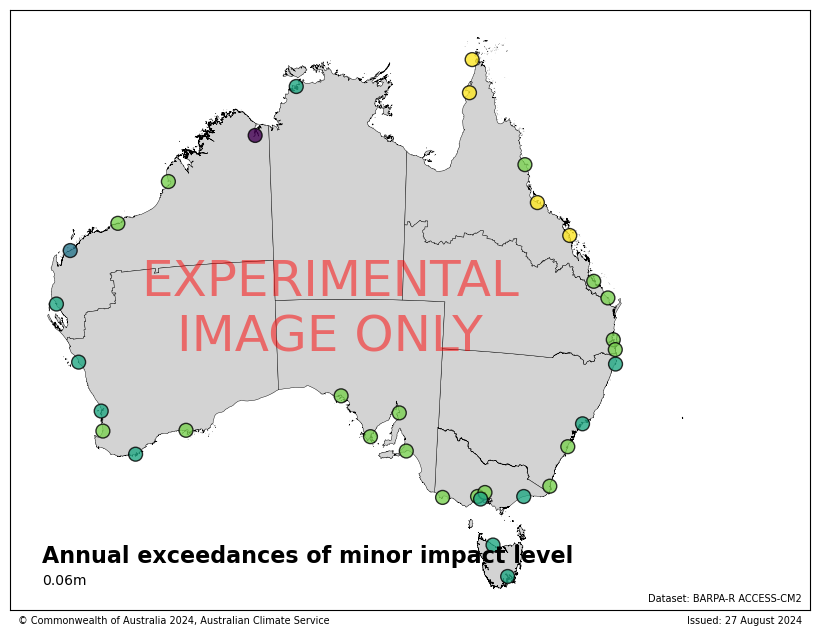

In [6]:
var = "0.06m 90th percentile"

plot_acs_hazard(station_df=df[["lat", "lon", var]],
                regions = regions_dict['ncra_regions'],
                cmap=cm.viridis_r,
                ticks=np.arange(0,18,3),
                cbar_extend="max",
                title = "Annual exceedances of minor impact level",
                date_range = "0.06m",
                cbar_label = "annual exceedances [days]",
                dataset_name = "BARPA-R ACCESS-CM2",
               facecolor="lightgrey");

In [7]:
# another example starting with a netcdf

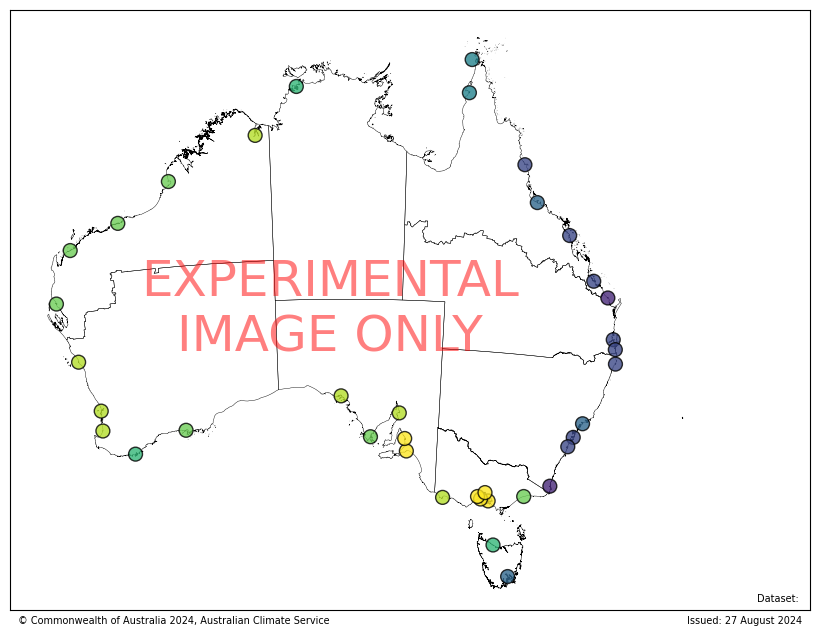

In [8]:
# read in netcdf
ds = xr.open_dataset("/g/data/ia39/ncra/coastal/MSL/sl_projection_anchors_ssp370.nc")

# select and arrange data into dataframe with columns ["lat", "lon", var]
df = ds.sel(PERCENTILE=50, TYEAR=2020)[["LONX", "LATY", "SL1"]].to_dataframe()[["LONX", "LATY", "SL1"]]
df = df.rename(columns = {"LONX": "lon", "LATY": "lat"})

var = "SL1"

plot_acs_hazard(station_df=df[["lat", "lon", var]],
                regions = regions_dict['ncra_regions'],
                cmap=cm.viridis_r,
                ticks=np.arange(0.04,0.06,0.002),
                cbar_extend="max",
                title = "",
                date_range = "",
                cbar_label = "",
                dataset_name = "",);